In [1]:
#Test Semana2

In [27]:
import pandas as pd
df=pd.read_csv('insurance_clean.csv')
df.head()

,Unnamed: 0,age,bmi,children,charges
0,1,18,33.77,1,1725.5523
1,2,28,33.00,3,4449.4620
2,4,32,28.88,0,3866.8552
3,5,31,25.74,0,3756.6216
4,6,46,33.44,1,8240.5896


In [19]:
df.corr()["age"].sort_values()

Unnamed: 0    0.032663
bmi           0.084214
children      0.155242
charges       0.957013
age           1.000000
Name: age, dtype: float64

In [28]:
X=df["age"].values.reshape(-1,1)
y=df["charges"].values.reshape(-1,1)

In [29]:
#2.1 Modelo Regresion Polinomial
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [31]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
reg = LinearRegression().fit(X_train_poly,y_train)
y_train_hat = reg.predict(X_train_poly)
y_test_hat = reg.predict(X_test_poly)

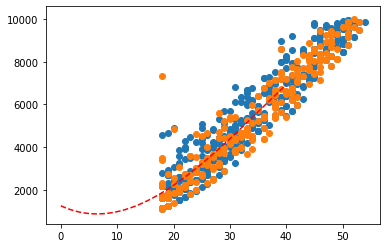

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0,40).reshape(-1, 1)
X_plot_poly = poly.fit_transform(X_plot)
y_plot = reg.predict(X_plot_poly)
plt.plot(X_plot, y_plot,"r--");

In [34]:
from sklearn.metrics import r2_score
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.9215324503604876
Prueba 0.909274445658157


In [14]:
#2.2 Modelo SVR
# ya tengo los datos preparados [definidos] del modelo 2.1, entonces voy directo al SVR

In [35]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [37]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [38]:
reg = svr_rbf.fit(X_train,y_train.reshape(-1))
y_train_hat = svr_rbf.predict(X_train)
y_test_hat = svr_rbf.predict(X_test)

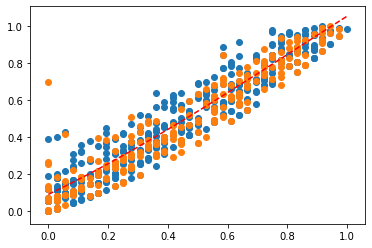

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_rbf.predict(X_plot)
plt.plot(X_plot, y_plot,"r--");

In [40]:
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.9202020639466746
Prueba 0.9065874212188278


In [41]:
reg = svr_lin.fit(X_train,y_train.reshape(-1))
y_train_hat = svr_lin.predict(X_train)
y_test_hat = svr_lin.predict(X_test)

Entrenamiento 0.920013131003473
Prueba 0.9043560190495173


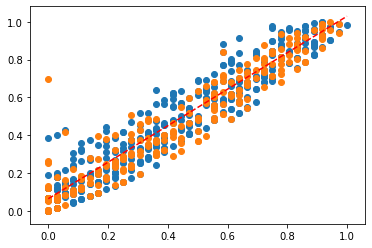

In [42]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_lin.predict(X_plot)
plt.plot(X_plot, y_plot,"r--")
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

In [43]:
svr_poly.fit(X_train,y_train.reshape(-1))
y_train_hat = svr_poly.predict(X_train)
y_test_hat = svr_poly.predict(X_test)

Entrenamiento 0.9210476345389949
Prueba 0.9070162459513766


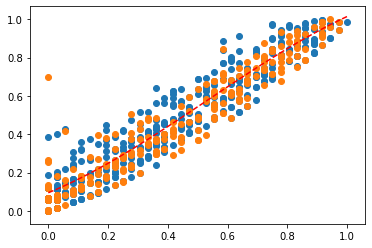

In [44]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
X_plot = np.linspace(0,1).reshape(-1, 1)
y_plot = svr_poly.predict(X_plot)
plt.plot(X_plot, y_plot,"r--")
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

RBF Entrenamiento 0.9202020639466746
RBF Prueba 0.9065874212188278
Linear Entrenamiento 0.920013131003473
Linear Prueba 0.9043560190495173
Poly Entrenamiento 0.9210476345389949
Poly Prueba 0.9070162459513766


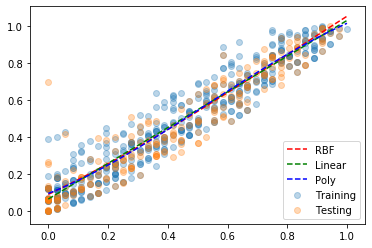

In [45]:
#esta parte no es necesaria en la tarea, pero quiero ver como queda con el bucle For ya que con tantos datos es dificil
#ver las diferencias entre los modelos graficados

plt.scatter(X_train, y_train,label="Training",alpha=0.3)
plt.scatter(X_test, y_test, label="Testing",alpha=0.3)
X_plot = np.linspace(0,1).reshape(-1, 1)
    
for name, svr, s in zip(["RBF","Linear","Poly"],[svr_rbf,svr_lin,svr_poly],["r--","g--","b--"]):
    svr.fit(X_train,y_train.reshape(-1))
    y_train_hat = svr.predict(X_train)
    y_test_hat = svr.predict(X_test)    
    y_plot = svr.predict(X_plot)
    plt.plot(X_plot, y_plot, s,label=name)
    print(name, "Entrenamiento", r2_score(y_train, y_train_hat))
    print(name, "Prueba", r2_score(y_test, y_test_hat))

plt.legend()

In [46]:
#ahora comparando si se ven las diferencia de modelo

In [47]:
#2.3 Modelo de arbol
#ya de los ejercicios anteriores tengo los datos definidos, en minmax scaler y el train split
# de manera que voy directo a importar el modelo:
from sklearn.tree import DecisionTreeRegressor
tree_2 = DecisionTreeRegressor(max_depth=2)

In [48]:
reg = tree_2.fit(X_train,y_train.reshape(-1))
y_train_hat = tree_2.predict(X_train)
y_test_hat = tree_2.predict(X_test)

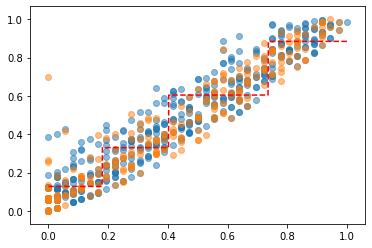

In [49]:
#tambien ya tengo las librerias de graficas importadas
plt.scatter(X_train, y_train,alpha=0.5)
plt.scatter(X_test, y_test,alpha=0.5)
X_plot = np.linspace(0,1,1000).reshape(-1, 1)
y_plot = tree_2.predict(X_plot)
plt.plot(X_plot, y_plot,"r--");

In [50]:
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.8830213199627284
Prueba 0.8469009321240903


In [ ]:
# Ejercicio de regresion logistica

In [73]:
df["over5000"] = (df["charges"] > 5000).map({False: 0, True: 1})

X = df['age'].values.reshape(-1, 1)
y = df['over5000']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [77]:
print(X.shape)
print(y.shape)

(712, 1)
(712,)


In [78]:
from sklearn.linear_model import LogisticRegression

In [84]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train) 
y_train_hat = clf.predict(X_train) 
y_test_hat = clf.predict(X_test) 
clf.score(X_train,y_train)


0.9475890985324947

In [85]:
clf.score(X_test,y_test)

0.9191489361702128

In [86]:
pro = clf.predict_proba(X_train)[:,0]

In [87]:
pro

array([9.99812330e-01, 9.69340757e-01, 4.95001997e-02, 9.97569341e-01,
       6.60827144e-06, 1.57988345e-01, 4.95001997e-02, 7.55757049e-03,
       4.51907090e-05, 2.62618447e-01, 6.60827144e-06, 4.51907090e-05,
       8.22163406e-01, 4.95001997e-02, 8.97701571e-01, 9.99812330e-01,
       9.99324173e-01, 8.97701571e-01, 9.43364284e-01, 9.99643838e-01,
       9.99901120e-01, 9.99901120e-01, 9.98717971e-01, 7.08932418e-01,
       4.03348091e-01, 5.86297621e-04, 3.08967370e-04, 7.08932418e-01,
       7.55757049e-03, 5.86297621e-04, 9.99901120e-01, 2.62618447e-01,
       8.57743709e-05, 9.91297641e-01, 2.10915209e-03, 9.99812330e-01,
       9.95396343e-01, 3.99587604e-03, 1.83416297e-06, 9.99812330e-01,
       7.08932418e-01, 9.99812330e-01, 9.99643838e-01, 9.97569341e-01,
       9.91297641e-01, 7.08932418e-01, 9.99812330e-01, 1.42485387e-02,
       9.99901120e-01, 2.10915209e-03, 9.99324173e-01, 7.55757049e-03,
       9.83609892e-01, 4.95001997e-02, 3.08967370e-04, 9.99812330e-01,
      

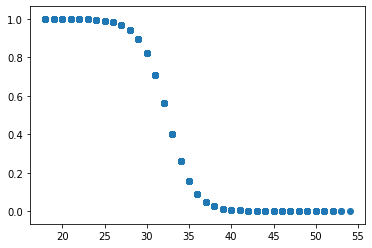

In [89]:
plt.scatter(X_train,pro);

In [81]:
#parte de matriz de confusion

In [102]:
df.head()

,Unnamed: 0,age,bmi,children,charges,over5000
0,1,18,33.77,1,1725.5523,0
1,2,28,33.00,3,4449.4620,0
2,4,32,28.88,0,3866.8552,0
3,5,31,25.74,0,3756.6216,0
4,6,46,33.44,1,8240.5896,1


In [109]:
from sklearn.metrics import confusion_matrix
labels = ['0','1']
confusion_matrix(y_train,y_train_hat)

array([[224,  11],
       [ 14, 228]])

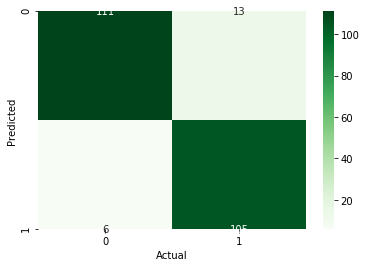

In [112]:
import seaborn as sns
cm = confusion_matrix(y_test,y_test_hat)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')

plt.ylabel('Predicted')

plt.xlabel('Actual');

plt.savefig("figura.png")

In [115]:
TP,FP,FN,TN=cm.flatten()
print(TP,FP,FN,TN)

111 13 6 105


In [118]:
PPV = TP/(TP+FP)
PPV

0.8951612903225806

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

0.9191489361702128
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       124
           1       0.89      0.95      0.92       111

    accuracy                           0.92       235
   macro avg       0.92      0.92      0.92       235
weighted avg       0.92      0.92      0.92       235

